In [1]:
#Importing modules
import scanpy as sc
import anndata as ad
import numpy as np
import pandas as pd
import episcanpy.api as epi

Reading Data Matrix

In [2]:
mat= sc.read_mtx('counts_matrix.mtx') 

In [3]:
mat

AnnData object with n_obs × n_vars = 244544 × 10309

In [4]:
main_da = mat

Reading Barcodes and Peaks

In [5]:
gg=pd.read_table('peaks.tsv',sep='/t',header=None)
codes = pd.read_csv('barcodes.tsv',sep='/t',header=None)
peaks=gg
barcodes=codes

Attaching obs and vars to the matrix data

In [6]:
main_da.obs_names = gg
main_da.var_names = codes

AnnData expects .obs.index to contain strings, but got values like:
    [('chr1:3005833-3005982',), ('chr1:3094772-3095489',), ('chr1:3119556-3120739',), ('chr1:3121334-3121696',), ('chr1:3134637-3135032',)]

    Inferred to be: mixed

AnnData expects .var.index to contain strings, but got values like:
    [('09A_GATGCGCGGCTA',), ('09A_GCCATGACCCCA',), ('09F_TGGACGATTTGT',), ('09K_GTCTGCCATTAC',), ('09F_GGATGAAGAGGG',)]

    Inferred to be: mixed



In [7]:
main_da


AnnData object with n_obs × n_vars = 244544 × 10309

In [8]:
da = ad.AnnData.transpose(main_da)

Filtering cells with atleast one feature 
Filtering features with atleast one cell

In [9]:
epi.pp.filter_cells(da, min_features=1)
epi.pp.filter_features(da, min_cells=1)


In [10]:
da

AnnData object with n_obs × n_vars = 10309 × 244538
    obs: 'nb_features'
    var: 'n_cells'

In [11]:
da.obs_names

Index([('09A_GATGCGCGGCTA',), ('09A_GCCATGACCCCA',), ('09F_TGGACGATTTGT',),
       ('09K_GTCTGCCATTAC',), ('09F_GGATGAAGAGGG',), ('09C_AGCCCGCCATGG',),
       ('09A_GCCTTCTTCCGT',), ('09F_GTAAAGCCAACA',), ('09D_TCCAGGCACGGA',),
       ('09A_GTAGGAAGCCAC',),
       ...
       ('09I_ATTCCCCCGTAA',), ('09G_CGAACCTCGCCC',), ('09I_AATGTAATCCTC',),
       ('09G_TCAATATAGGAA',), ('09A_GCAGTTCGCGGC',), ('09F_AACCTCACTGAC',),
       ('09B_CACGTTAGCGCG',), ('09L_ATGTCAGATATA',), ('09L_AGTGGCCTCCTT',),
       ('09L_AGTCGGAACTCT',)],
      dtype='object', length=10309)

In [12]:
da.var_names

Index([  ('chr1:3005833-3005982',),   ('chr1:3094772-3095489',),
         ('chr1:3119556-3120739',),   ('chr1:3121334-3121696',),
         ('chr1:3134637-3135032',),   ('chr1:3164929-3165186',),
         ('chr1:3167174-3167517',),   ('chr1:3181253-3181529',),
         ('chr1:3204775-3205172',),   ('chr1:3210899-3211332',),
       ...
         ('chrY:1286238-1286811',),   ('chrY:1299405-1299847',),
       ('chrY:10640917-10641104',), ('chrY:90719613-90719806',),
       ('chrY:90726135-90726362',), ('chrY:90732105-90732474',),
       ('chrY:90740917-90741416',), ('chrY:90741519-90742734',),
       ('chrY:90742824-90743114',), ('chrY:90744284-90744731',)],
      dtype='object', length=244538)

In [13]:
da.obs['log_nb_features'] = [np.log10(x) for x in da.obs['nb_features']]
da

AnnData object with n_obs × n_vars = 10309 × 244538
    obs: 'nb_features', 'log_nb_features'
    var: 'n_cells'

Analyzing the data

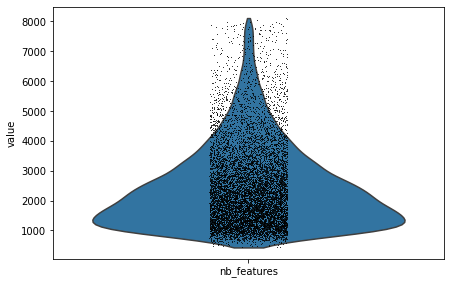

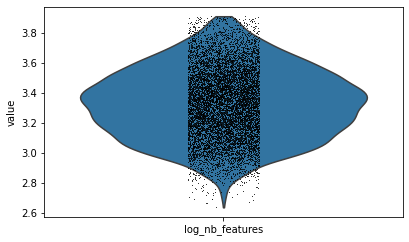

In [14]:
epi.pl.violin(da, ['nb_features'])
epi.pl.violin(da, ['log_nb_features'])

Changing the minimum number of features and cells for better clustering

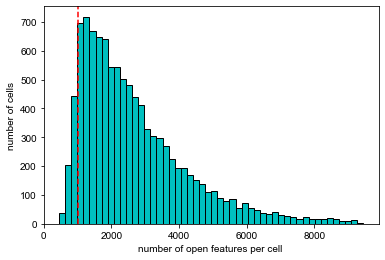

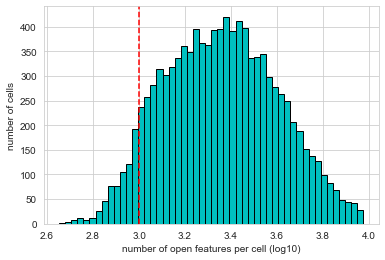

In [15]:
min_features = 1000

epi.pp.coverage_cells(da, binary=True, log=False, bins=50,threshold=min_features)
epi.pp.coverage_cells(da, binary=True, log=10, bins=50,threshold=min_features)

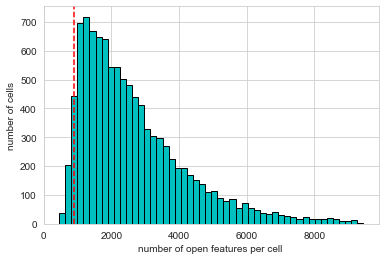

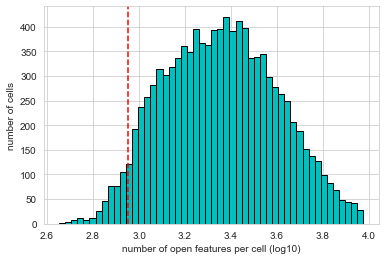

In [16]:
min_features = 900

epi.pp.coverage_cells(da, binary=True, log=False, bins=50,threshold=min_features)
epi.pp.coverage_cells(da, binary=True, log=10, bins=50,threshold=min_features)

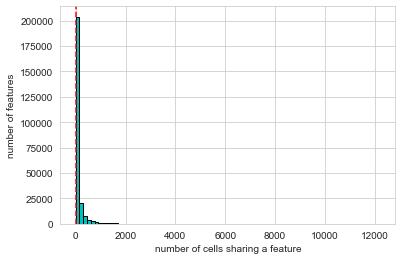

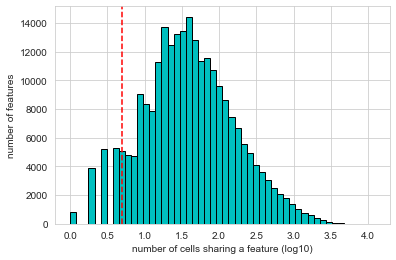

In [17]:
min_cells = 5
epi.pp.coverage_features(da, binary=True, log=False, threshold=min_cells)
epi.pp.coverage_features(da, binary=True, log=True, threshold=min_cells)

In [18]:
min_features = 900
epi.pp.filter_cells(da, min_features=min_features)
da

AnnData object with n_obs × n_vars = 9797 × 244538
    obs: 'nb_features', 'log_nb_features'
    var: 'n_cells', 'commonness'

In [19]:
min_cells = 5
epi.pp.filter_features(da, min_cells=min_cells)
da

AnnData object with n_obs × n_vars = 9797 × 227796
    obs: 'nb_features', 'log_nb_features'
    var: 'n_cells', 'commonness'

Getting the most variabe features

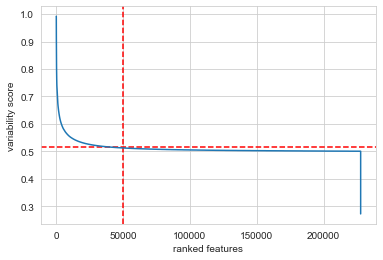

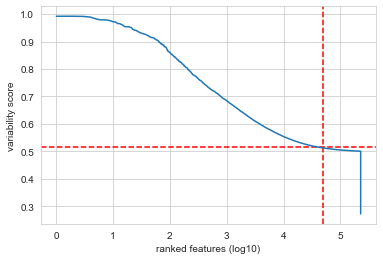

In [20]:
min_score_value = 0.515
nb_feature_selected = 50000
epi.pl.variability_features(da,log=None,min_score=min_score_value, nb_features=nb_feature_selected,)

epi.pl.variability_features(da,log='log10',min_score=min_score_value, nb_features=nb_feature_selected)


In [21]:
# save the current matrix in the raw layer
da.raw = da

In [22]:
# create a new AnnData containing only the most variable features
adata = epi.pp.select_var_feature(da,
                                  nb_features=50000,
                                  show=False,
                                  copy=True)

In [23]:
adata

View of AnnData object with n_obs × n_vars = 9797 × 50318
    obs: 'nb_features', 'log_nb_features'
    var: 'n_cells', 'commonness', 'prop_shared_cells', 'variability_score'

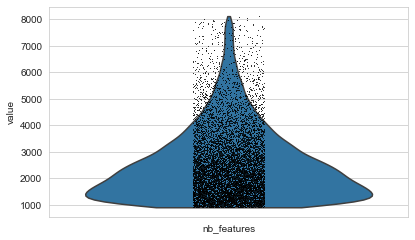

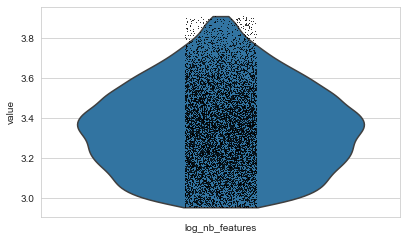

In [24]:
epi.pl.violin(adata, ['nb_features'])
epi.pl.violin(adata, ['log_nb_features'])

In [25]:
adata

View of AnnData object with n_obs × n_vars = 9797 × 50318
    obs: 'nb_features', 'log_nb_features'
    var: 'n_cells', 'commonness', 'prop_shared_cells', 'variability_score'

In [26]:
epi.pp.filter_cells(adata, min_features=1000)
epi.pp.filter_cells(adata, max_features=45000)

In [27]:
adata

AnnData object with n_obs × n_vars = 8010 × 50318
    obs: 'nb_features', 'log_nb_features'
    var: 'n_cells', 'commonness', 'prop_shared_cells', 'variability_score'

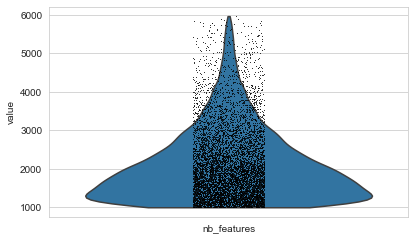

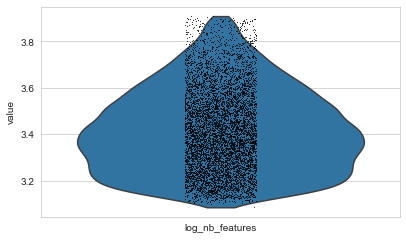

In [28]:
epi.pl.violin(adata, ['nb_features'])
epi.pl.violin(adata, ['log_nb_features'])

Clustering

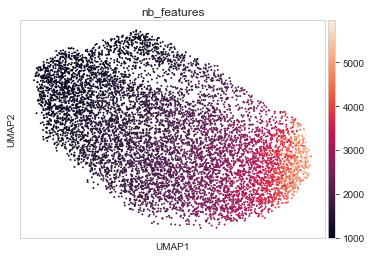

In [29]:
epi.pp.lazy(adata)
sc.pl.umap(adata, color=['nb_features'], wspace=0.3)

In [30]:
# save the current version of the matrix (binary, not normalised) in a layer of the Anndata.
adata.layers['binary'] = adata.X.copy()

In [31]:
epi.pp.normalize_total(adata)

In [32]:
# save the current version of the matrix (normalised) in a layer of the Anndata.
adata.layers['normalised'] = adata.X.copy()

In [33]:
adata

AnnData object with n_obs × n_vars = 8010 × 50318
    obs: 'nb_features', 'log_nb_features'
    var: 'n_cells', 'commonness', 'prop_shared_cells', 'variability_score'
    uns: 'pca', 'neighbors', 'tsne', 'umap'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    layers: 'binary', 'normalised'
    obsp: 'distances', 'connectivities'

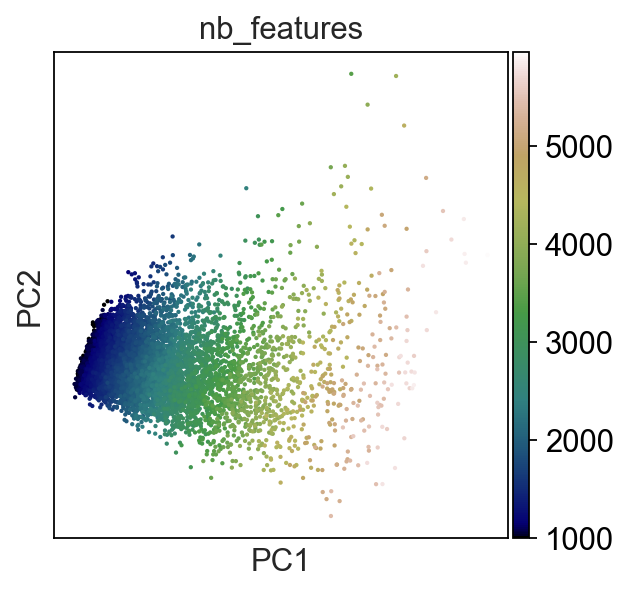

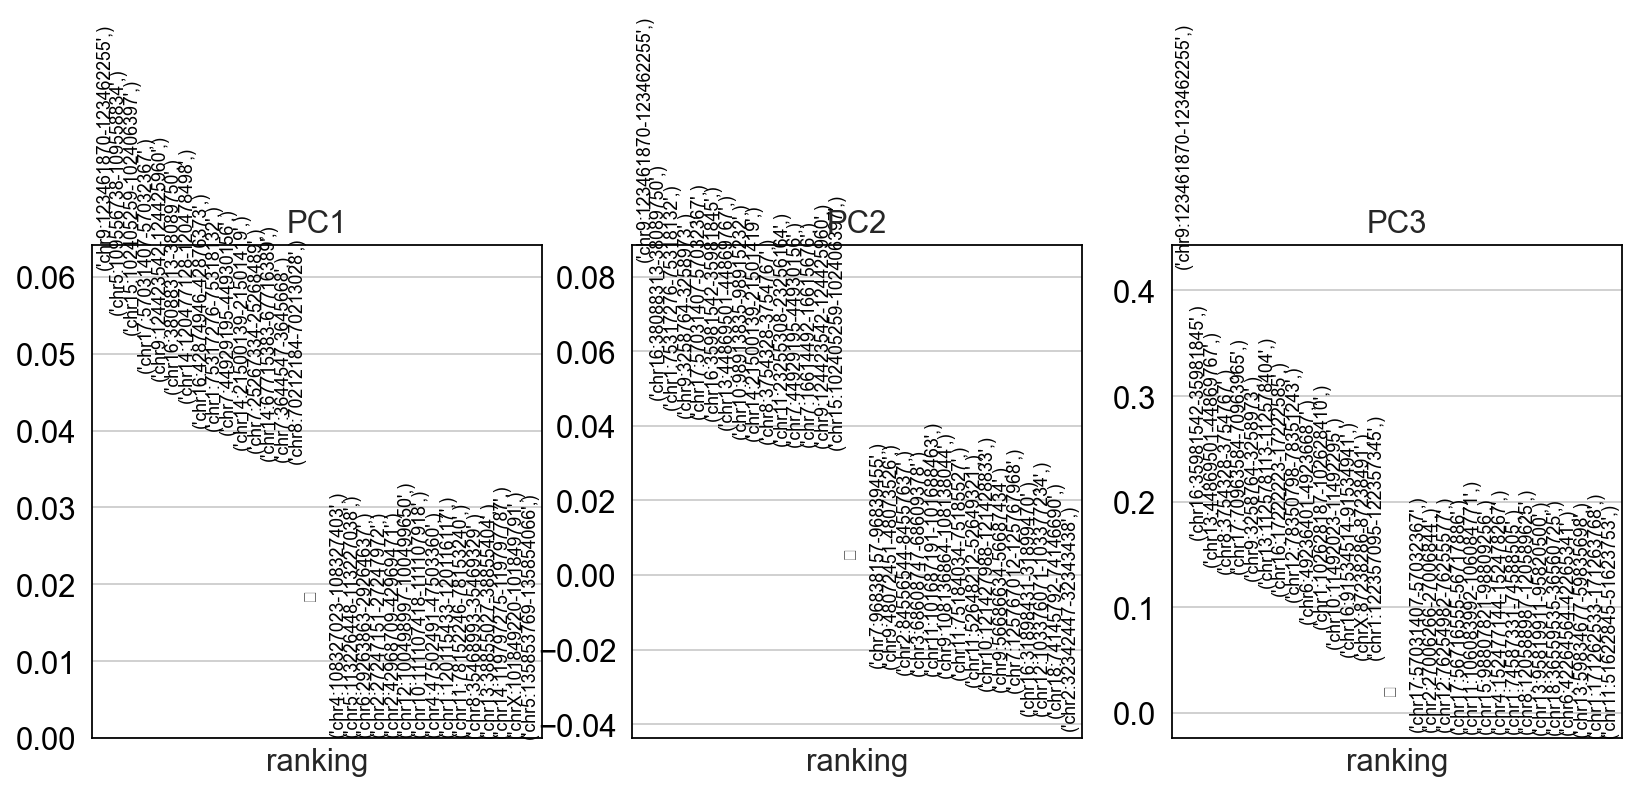

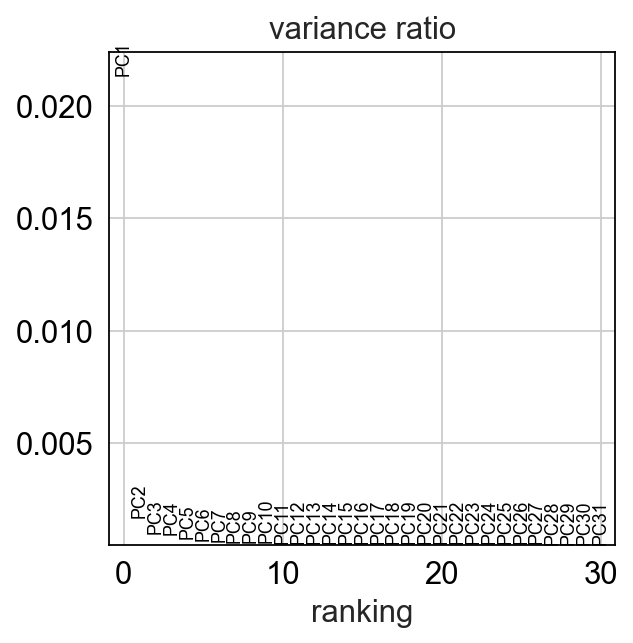

In [34]:
sc.settings.set_figure_params(dpi=80, color_map='gist_earth')
epi.pl.pca_overview(adata, color=['nb_features'])

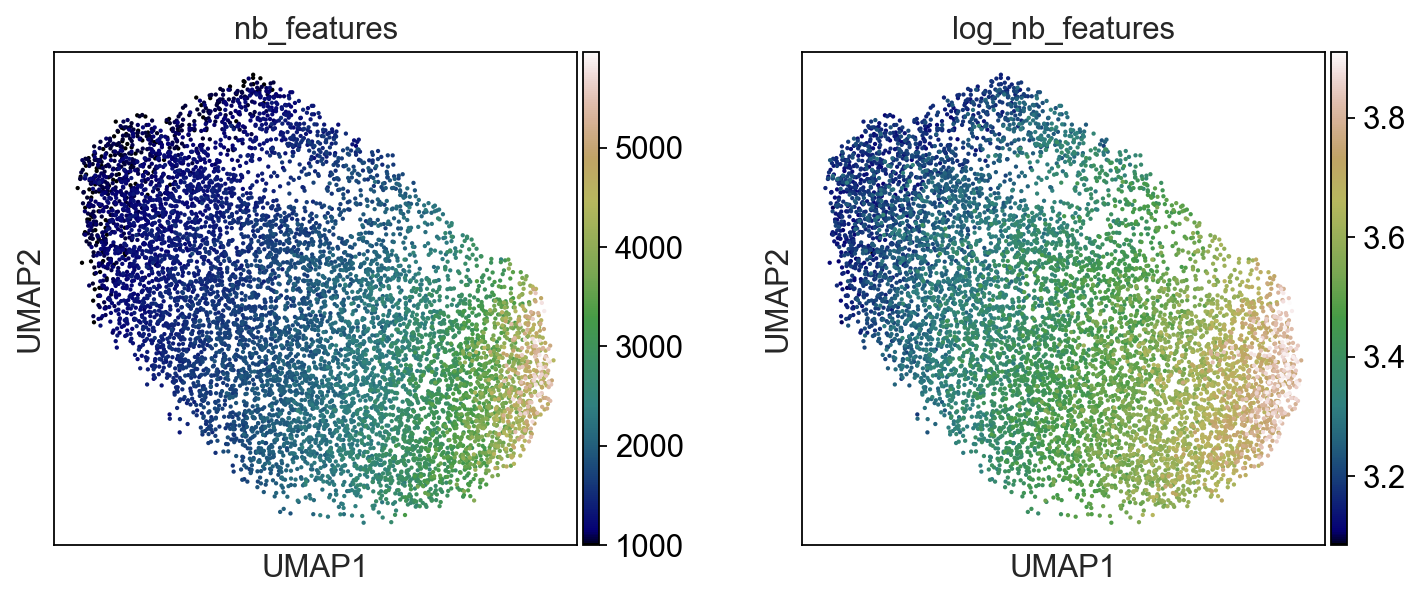

In [35]:
epi.pl.umap(adata, color=['nb_features', 'log_nb_features'], wspace=0.3)

Louvain Clustering

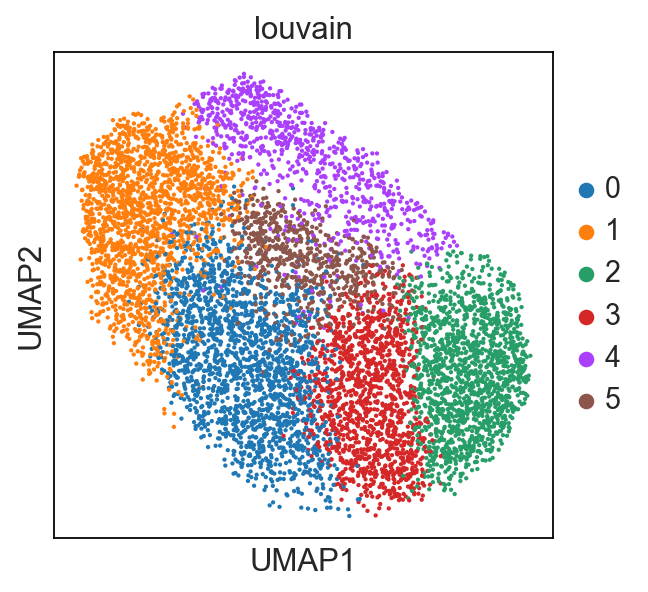

In [36]:
epi.tl.louvain(adata)
epi.pl.umap(adata, color=['louvain'], wspace=0.4)

In [52]:
epi.tl.getNClusters(adata, n_cluster=7)

step 0
got 12 at resolution 1.5
step 1
got 6 at resolution 0.75
step 2
got 9 at resolution 1.125
step 3
got 6 at resolution 0.9375
step 4
got 7 at resolution 1.03125


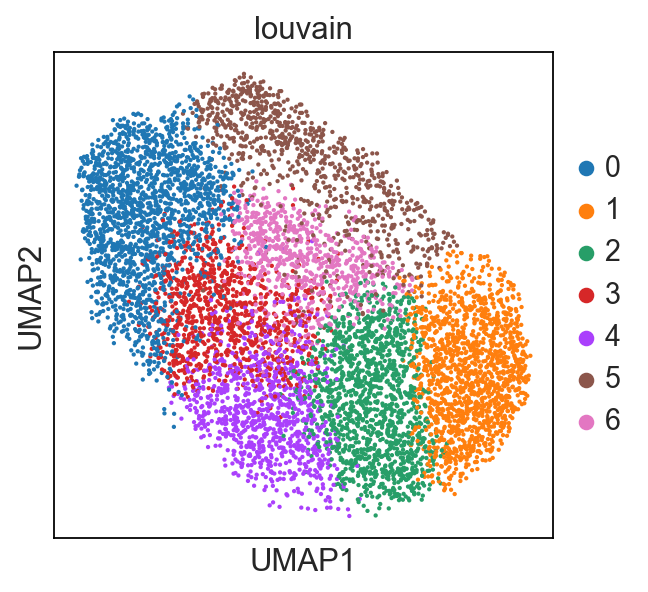

In [53]:
epi.pl.umap(adata, color=['louvain'], wspace=0.4)

Kmeans Clustering

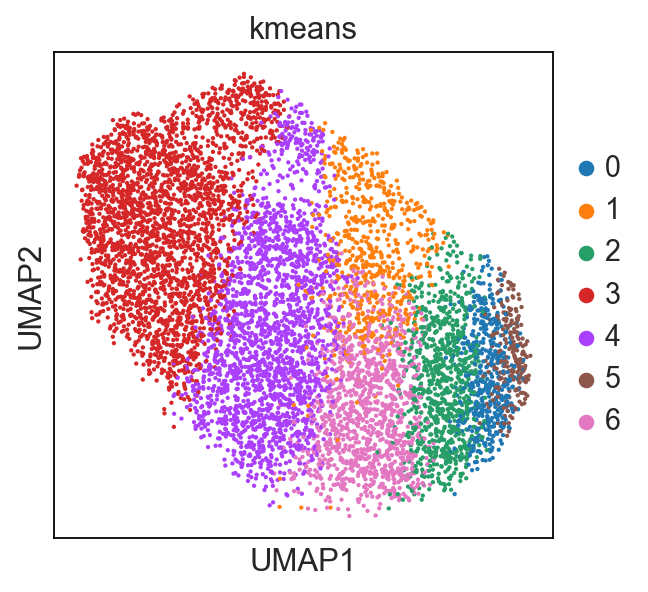

In [54]:
epi.tl.kmeans(adata, num_clusters=7)
epi.pl.umap(adata, color=['kmeans'], wspace=0.4)

Hierarchical Clusering

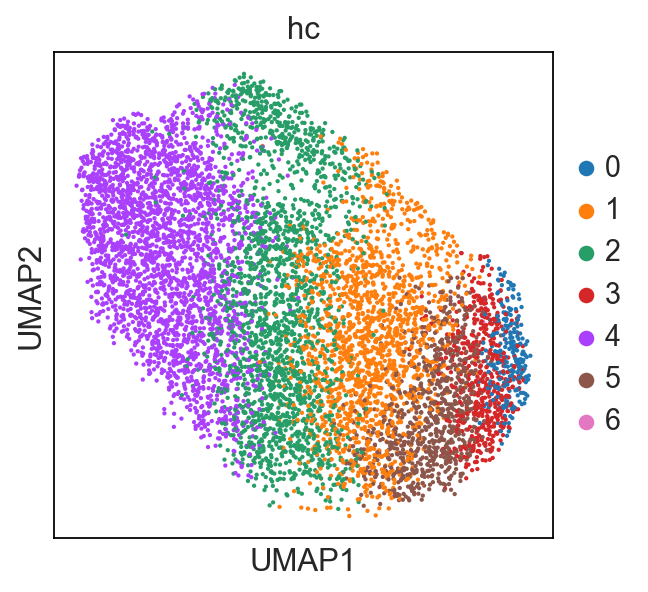

In [55]:
epi.tl.hc(adata, num_clusters=7)
epi.pl.umap(adata, color=['hc'], wspace=0.4)

Leiden Clustering

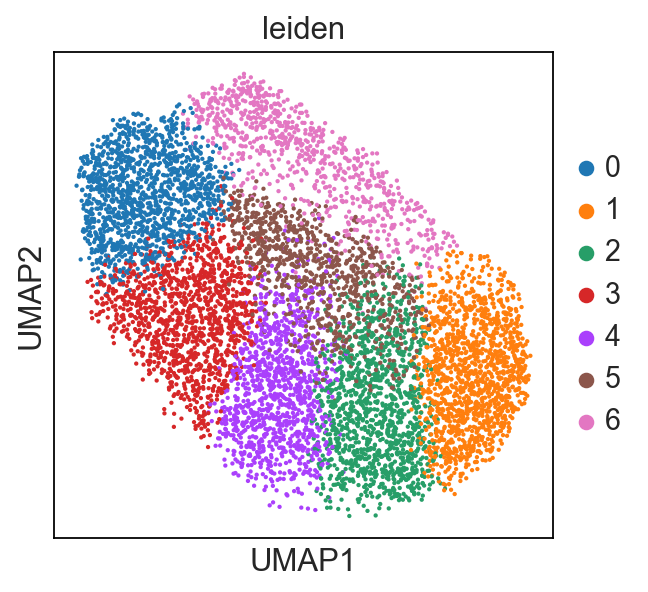

In [56]:
epi.tl.leiden(adata)
epi.pl.umap(adata, color=['leiden'], wspace=0.4)

In [60]:
epi.tl.getNClusters(adata, n_cluster=7, method='leiden')

step 0
got 11 at resolution 1.5
step 1
got 6 at resolution 0.75
step 2
got 10 at resolution 1.125
step 3
got 7 at resolution 0.9375


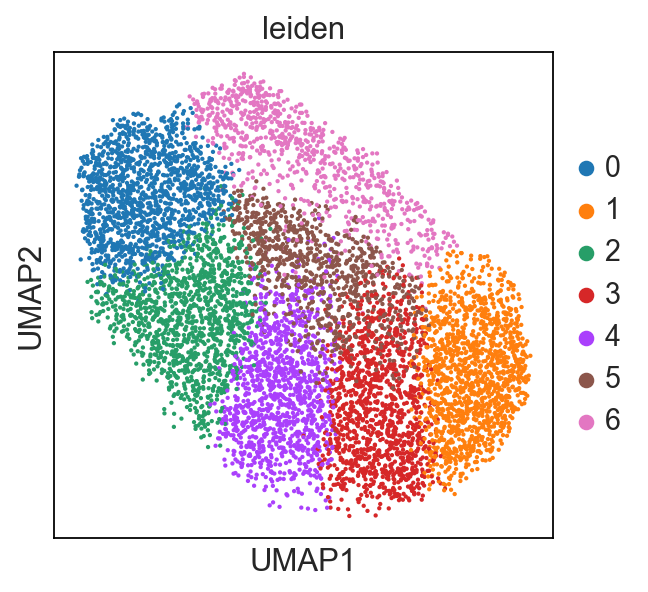

In [61]:
epi.pl.umap(adata, color=['leiden'], wspace=0.4)

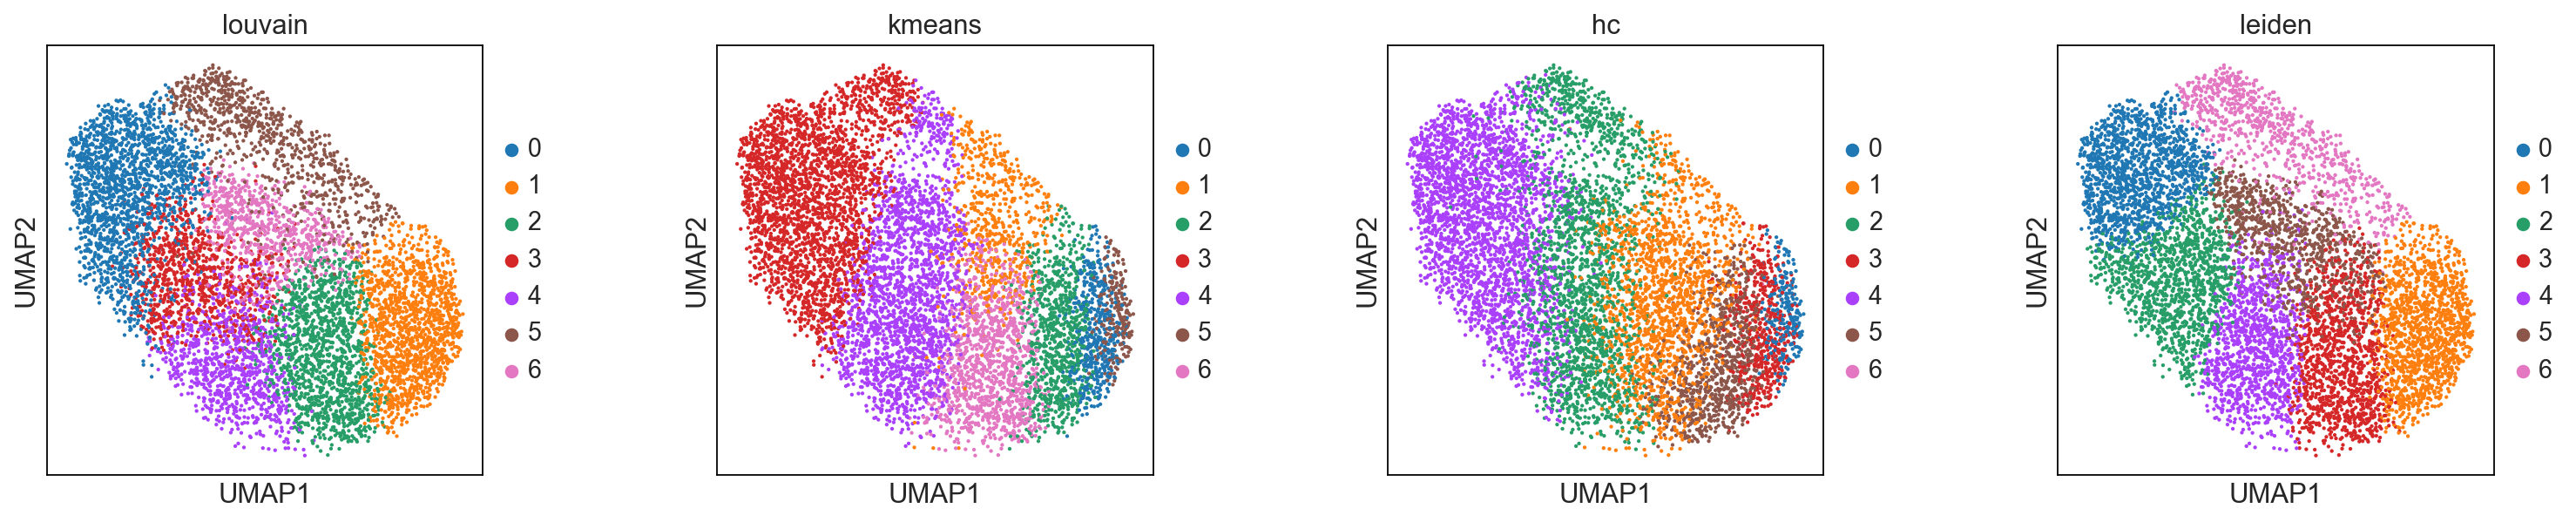

In [62]:
epi.pl.umap(adata, color=['louvain', 'kmeans', 'hc', 'leiden'], wspace=0.4)